In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread("ImagenBogota.png", cv2.IMREAD_GRAYSCALE)

In [15]:
def bit_plane_slicing(imagen, k):
    plane = np.full((imagen.shape[0], imagen.shape[1]), 2 ** k, np.uint8)
    return cv2.bitwise_and(plane, imagen)

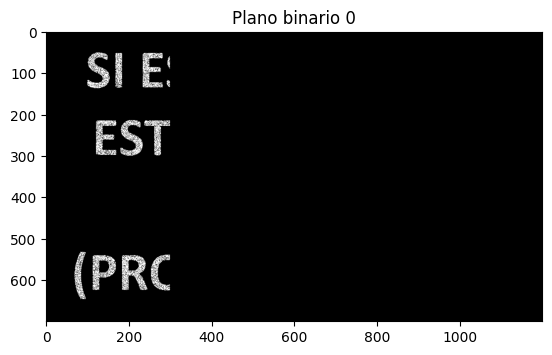

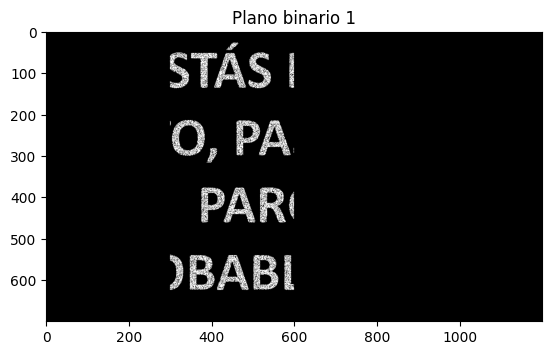

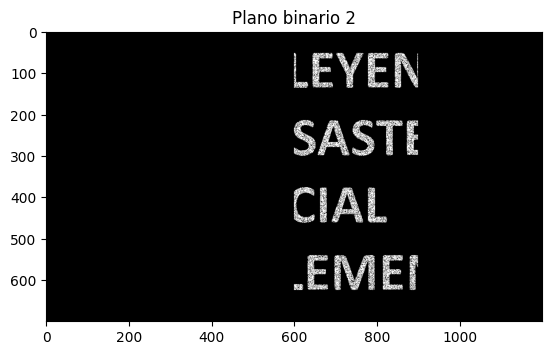

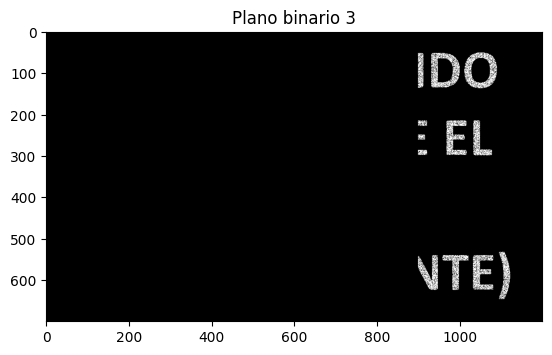

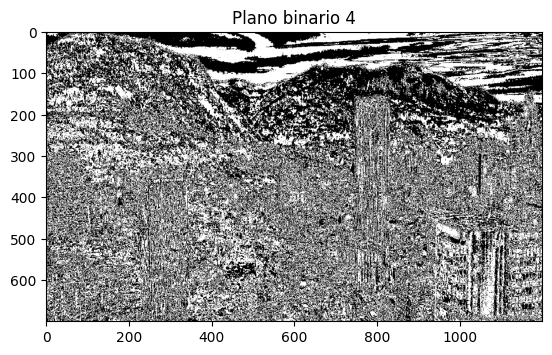

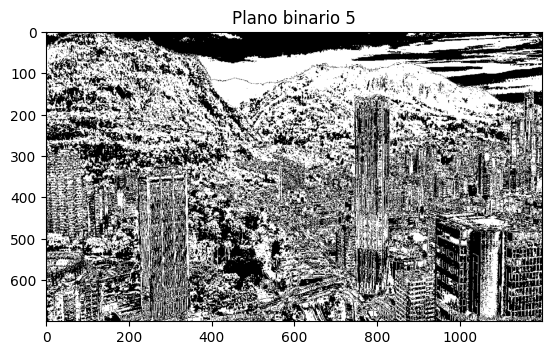

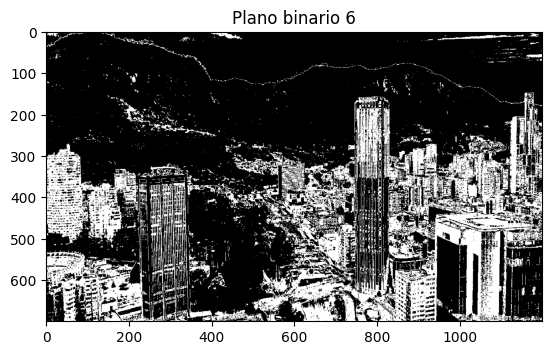

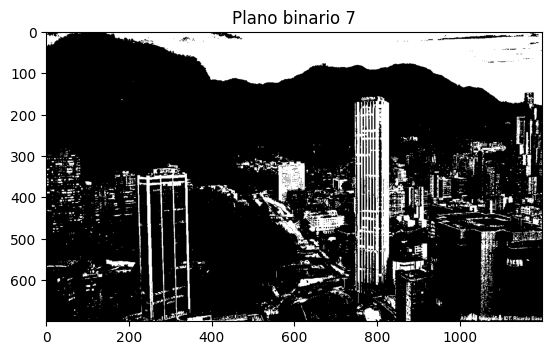

In [16]:
for i in range(0, 8):
    plano = bit_plane_slicing(imagen, i)
    plt.figure()
    plt.imshow(plano, cmap="gray")
    plt.title(f"Plano binario {i}")
    plt.show()

Se deben de unir los 4 planos binarios menos significativos. Para esto se realizan operaciones de OR, donde se unen las zonas de las imagenes donde hay valores de intensidad mayores a 0 y se reconstruye el mensaje.

[0 1]
[0 2]
[0 4]
[0 8]


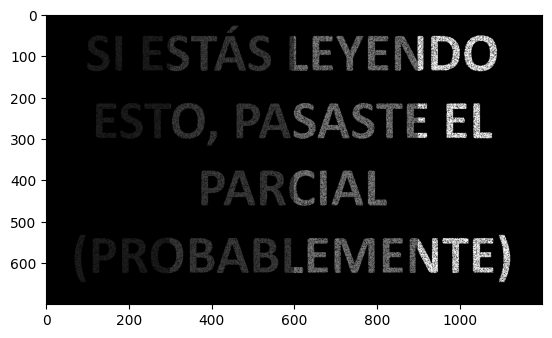

In [17]:
msg_img = np.zeros(imagen.shape, np.uint8)
for i in range (4):
    plano = bit_plane_slicing(imagen, i)
    print(np.unique(plano))
    msg_img = cv2.bitwise_or(msg_img, plano)
    
plt.imshow(msg_img, cmap="gray")
plt.show()

Asignar a cada plano la mayor intensidad para que el mensaje se vea uniforme

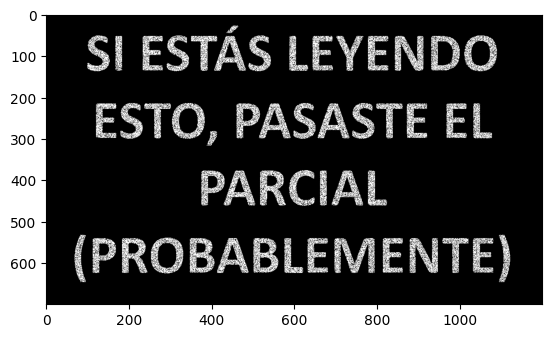

In [18]:
msg_img = np.zeros(imagen.shape, np.uint8)
for i in range (4):
    plano = bit_plane_slicing(imagen, i) * 255
    msg_img = cv2.bitwise_or(msg_img, plano)
    
plt.imshow(msg_img, cmap="gray")
plt.show()